# Scenario

Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

 

I have to come up with ideas for how to increase employee retention. To help with this, I choose a design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

For example, I could build and evaluate a statistical model such as logistic regression. Or, you could build and evaluate machine learning models such as decision tree, random forest, and XGBoost. Or, you could choose to deploy both statistical and machine learning models. 

For any approach, I will need to analyze the key factors driving employee turnover, build an effective model, and share recommendations.

# Data Dictionary


**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).


The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

# Question to be answered (Plan Stage)

*  Who are the stakeholders for this project?
- What I am trying to solve or accomplish?
- What are my initial observations when I explore the data?
- What resources do I find myself using as I complete this stage? 
- Do I have any ethical considerations in this stage?


## Step 1 - Imports

- Import all packages needed
- Import the data set

### Import packages


In [1]:
#pip install xgboost


In [64]:
# For data manipulation
import numpy as np
import pandas as pd
from scipy import stats

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.metrics import make_scorer

# For saving models
import pickle

### Load dataset

In [4]:
df0 = pd.read_csv("/Users/adel/Desktop/HR_capstone_dataset.csv")

In [5]:
# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)



### Discover the data

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


It is important to transfer all column names to the same format. The format that will be adopted is the most common format "Snake_Case". Therefore, I am going to create a function that automatically transfers all column names to the desired format.

In [7]:
# Function to convert column names to snake_case
def to_snake_case(column_name):
    # Convert to lowercase
    lowercase_name = column_name.lower()
    # Replace spaces and special characters with underscores
    snake_case_name = lowercase_name.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')
    return snake_case_name

# Apply the function to all column names
new_columns = [to_snake_case(col) for col in df0.columns]

# Rename columns in the DataFrame
df0.columns = new_columns


### Discriptive Statistics

In [8]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Missing Values

In [9]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values

### Check duplicates

In [10]:
df0.duplicated().sum()

3008

In [11]:
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Applying a likelihood anaylsis using Bayes' theorem. 

**Note: This is a sample on how to create a likelihood analysis; however, the results are not accurate due to assumptions on the prior distribution without furhter analysis (binomial for simplicity).**

In [12]:
from scipy.stats import binom

In [13]:
# Calculate the observed number of duplicates
num_duplicates = df0.duplicated().sum()

# Define the likelihood function (binomial distribution for duplicates)
def likelihood(theta, n, k):
    # n: total number of rows
    # k: observed number of duplicates
    return binom.pmf(k, n, theta)

# Specify the prior distribution (e.g., Beta distribution)
# Assume a Beta(1, 1) prior (uniform prior between 0 and 1)
def prior(theta):
    return 1  # Uniform prior between 0 and 1 (constant)

# Compute the posterior distribution using Bayes' theorem
def posterior(theta, n, k):
    return likelihood(theta, n, k) * prior(theta)

# Estimate the probability of duplicates using posterior distribution
n_rows = len(df0)
theta_values = np.linspace(0, 1, 100)  # Range of theta values (probability of duplicates)
posterior_values = posterior(theta_values, n_rows, num_duplicates)

# Find the maximum likelihood estimate (MLE) of theta (probability of duplicates)
mle_theta = theta_values[np.argmax(posterior_values)]

print(f"Maximum Likelihood Estimate (MLE) of theta (probability of duplicates): {mle_theta:.4f}")

Maximum Likelihood Estimate (MLE) of theta (probability of duplicates): 0.2020


**There are 3,008 rows that are duplicated. For simplicity, I am gonna drop the duplicates since there are multiple continous variables across the dataset and it is unlikely for these duplicates to be legitimate.**

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check for Outliers

**Identify outliers using the interquantile range method and boxplot visualization**

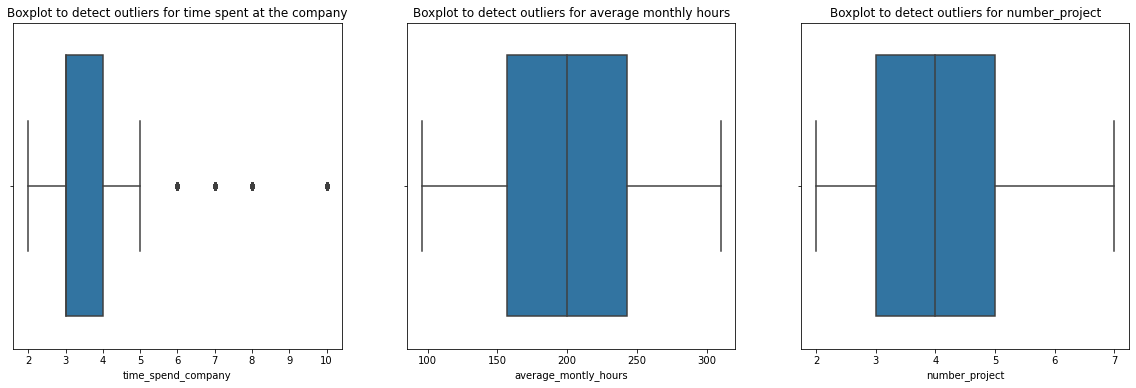

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # 2 rows, 1 column

sns.boxplot(x=df1["time_spend_company"], ax=axs[0])
axs[0].set_title('Boxplot to detect outliers for time spent at the company', fontsize=12)

sns.boxplot(x=df1["average_montly_hours"], ax = axs[1])
axs[1].set_title('Boxplot to detect outliers for average monthly hours', fontsize=12)

sns.boxplot(x=df1["number_project"], ax= axs[2])
axs[2].set_title('Boxplot to detect outliers for number_project', fontsize=12)

# Save the plot
plt.savefig('Outliers Box plot.png')  # Save as PNG


Looks like for the time spent at the company there are obvious outliers

In [46]:
def Outliers_detection(col):


    #Define the 25th and the 75th percentile
    percentile25 = col.quantile(0.25)
    percentile75 = col.quantile(0.75)

    #Calculate the inter quantile range
    iqr = percentile75 - percentile25

    #Define the upper and lower bounds
    Upper_limit = percentile75 + 1.5 * iqr
    Lower_limit = percentile25 - 1.5 * iqr

    print("The upper limit is:", Upper_limit)
    print("The lower limit is:", Lower_limit)

    #Identify outliers
    outliers = df1[(col > Upper_limit) | (col < Lower_limit)]

    print("Number of outliers is:", len(outliers))

In [47]:
Outliers_detection(df1["time_spend_company"])

The upper limit is: 5.5
The lower limit is: 1.5
Number of outliers is: 824


In [19]:
Outliers_detection(df1["average_montly_hours"])

The upper limit is: 372.0
The lower limit is: 28.0
Number of outliers is: 0


In [20]:
Outliers_detection(df1["number_project"])

The upper limit is: 8.0
The lower limit is: 0.0
Number of outliers is: 0


**Identify outliers using Z-score method and histogram visualization**

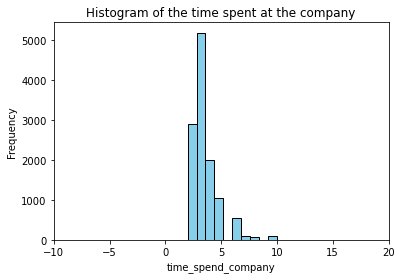

<Figure size 432x288 with 0 Axes>

In [21]:
#Explore the distribution of the time_spend_company 
#Construct a histogram for fast and convenient representation
plt.hist(df1['time_spend_company'], color='skyblue', edgecolor='black')

# Set the limits of the x-axis
plt.xlim(-10, 20)  # Adjust the limits according to your data range

# Add labels and title
plt.xlabel('time_spend_company')
plt.ylabel('Frequency')
plt.title('Histogram of the time spent at the company')

# Show the plot
plt.show()

plt.savefig("Histogram of time spent at the company")

It looks like the distrinution follows a normal distribution which is skewed to the right. So there is a possibility that I will detect some outliers in the data that has an abnormal positive value.

Now lets examine the possibility of following a normal distribution using the emperical method:

- 68% of value fall in the interval [mean +/- (1) standard deviation]
- 95% of value fall in the interval [mean +/- (2) standard deviation]
- 99.7% of value fall in the interval [mean +/- (3) standard deviation]

In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
def emperical_normal (df):
    
    num = [1,2,3]
    emperical_df = pd.DataFrame()
    
    for i in num:
    
        mean = df.mean()
        std = df.std()
    
        lower_limit = mean - i * std
        upper_limit = mean + i * std
    
        emperical_dist = ((df >= lower_limit) & (df <= upper_limit)).mean()*100
    
        emperical_dict = {"Mean": mean,
                 "Std": std,
                 "lower_limit": lower_limit,
                 "upper_limit": upper_limit,
                 "Distribution percentage %":emperical_dist}
        
        
        index = [f'Interval {68 if i==1 else 95 if i==2 else 99.7}'"%".format(i)]  #Using list of comprehension
    
            
        emperical_df = emperical_df.append(pd.DataFrame(emperical_dict, index=index))
        
 
        
    return emperical_df

In [23]:
emperical_normal(df1["time_spend_company"])

,Mean,Std,lower_limit,upper_limit,Distribution percentage %
Interval 68%,3.364857,1.33024,2.034617,4.695096,60.003336
Interval 95%,3.364857,1.33024,0.704378,6.025336,97.648236
Interval 99.7%,3.364857,1.33024,-0.625862,7.355576,98.432157


In [24]:
#use z-score to find outliers
df1['Z_score'] = stats.zscore(df1["time_spend_company"], ddof=1)
df1.head()

/var/folders/y2/nn4ysj1j0vjgh4j8xg9_nbl00000gq/T/ipykernel_2721/3828839451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Z_score'] = stats.zscore(df1["time_spend_company"], ddof=1)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,Z_score
0,0.38,0.53,2,157,3,0,1,0,sales,low,-0.274279
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1.980954
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.477465
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.229209
4,0.37,0.52,2,159,3,0,1,0,sales,low,-0.274279


In [25]:
Possible_ouliers = df1[(df1["Z_score"] > 3) | (df1["Z_score"] < -3)]
print("The number of outliers using the Z-score is :", len(Possible_ouliers))




The number of outliers using the Z-score is : 188


**Since the distribution doesn't exactly exhibit an emperical normal distribution, I will rely on the interqauntile range method which is optimal in this case because I dont have to assume NORMALITY for the distribution.**

## Step 3. Data Exploration extensive EDA on the depandant variable

In [26]:
df1["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [27]:
df1["left"].value_counts(normalize=True) *100

0    83.39588
1    16.60412
Name: left, dtype: float64

83.39% of the employees stayed with the company; however, 16.60% of employees left the company.

**Note: it looks like I will be dealing with an imbalanced data**

Start by a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

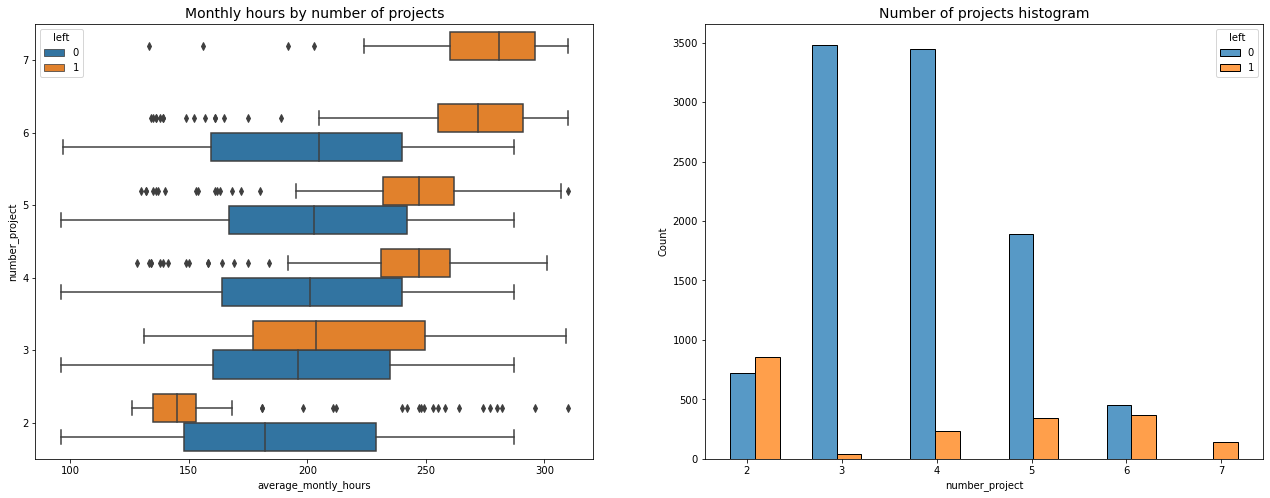

<Figure size 432x288 with 0 Axes>

In [28]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_montly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=3, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

plt.savefig("Average Monthly Hours vs Number of Projects")

In [29]:
#average number of hours a month that has to be worked on a normal job with two weeks vacation and saturday, sunday off
#weeks in a year
50*40 / 12  # 50 weeks a year X 40 hours a week / 12 months

166.66666666666666

<u>**Key Points:**

1. Almost all employees who worked on 3 or more projects worked more than 166.66 hours
2. The optimal number of projects for employees to work on seems to be 3-4. The ratio of left/stayed is very small for these cohorts.
3. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group.
4. within the same number of projects, employees who worked more than others left the company

**It looks like the employees are overworked**

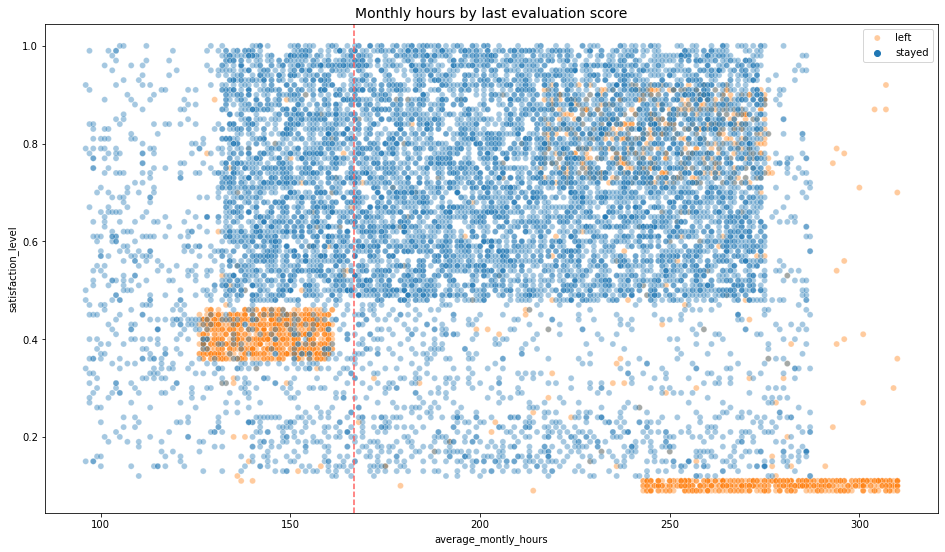

In [30]:
# Create a plot as needed 


# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=[ 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

plt.savefig("Monthly hours vs Last evaluation score")

Next, I could examine whether employees who worked very long hours were promoted in the last five years.

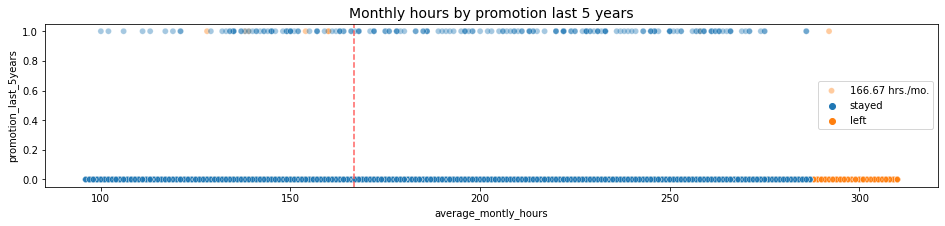

In [32]:

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed','left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

plt.savefig("Monthly hours vs promotion last 5 years")

In [33]:
df1["promotion_last_5years"].value_counts(normalize=True)*100

0    98.307064
1     1.692936
Name: promotion_last_5years, dtype: float64

Only 1.69% of employees were promoted in the last 5 years

**check for strong correlations between variables in the data.**

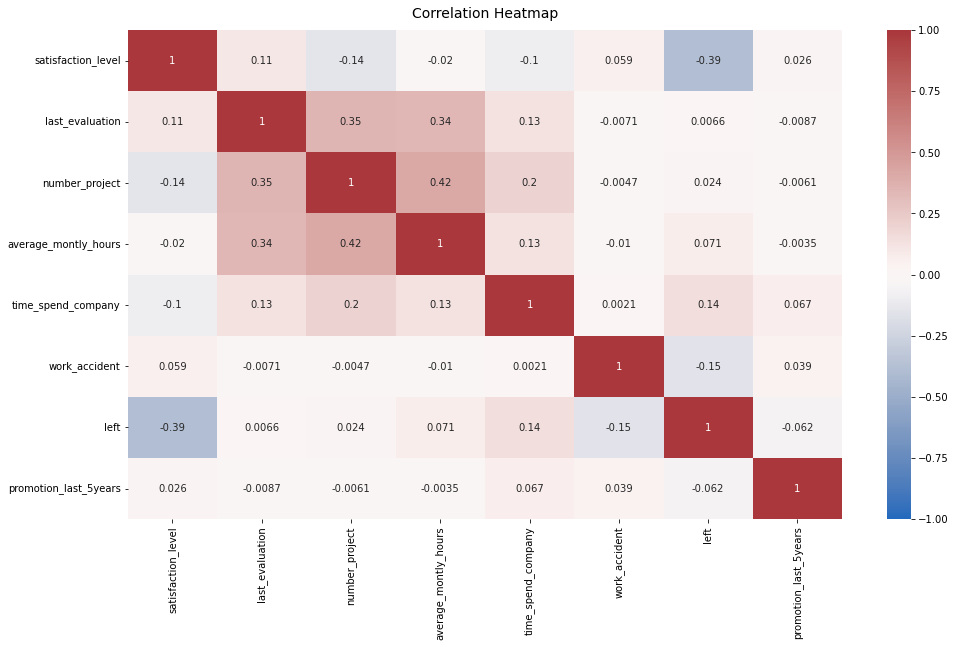

In [34]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

plt.savefig("Correlations between variables")

#vmin=-1,     # Set the minimum value for color mapping
#vmax=1,      # Set the maximum value for color mapping
#annot=True,  # Annotate each cell with the numeric value
#cmap=sns.color_palette("vlag", as_cmap=True))  # Set the color palette

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

# Construct Stage
1. Determine which models are most appropriate
2. Construct the model 
3. Confirm model assumptions
4. Evaluate model results to determine how well your model fits the data


## Determine which models are most appropriate

The goal is to predict whether an employee leaves the company. The dataset is considered labeled, since we have the dependant variable and the features (Independat Variables).

Therefore, my initial selection will be focused on **Supervised Machine Learning Model**

The outcome variable is categorical, specifically its binary:

    `1: Employee left
     0: Employee didnt leave

Therefore my options will be:

1. Logistic Regression
2. Naive Bayes
3. Tree-based models

    3a. Decision Tree Classifier
    
    3b. Random Forest Classifier
    
    3c. Gradient boosting machines (Adaboost or XGboost) Classifier

## Construct the model

### Modeling approach 1: Binomial Logistic Regression Model

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
 10  Z_score                11991 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB


Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [37]:
df1["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [38]:
# Copy the dataframe
df_enc = df1.copy()

ordinal_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_enc['salary'] = df_enc['salary'].map(ordinal_mapping)

df_enc["salary"].value_counts()

0    5740
1    5261
2     990
Name: salary, dtype: int64

In [39]:
# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

In [40]:
df_enc = df_enc.drop(columns = "Z_score", axis = 1)

In [41]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_montly_hours    11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   salary                  11991 non-null  int64  
 9   department_IT           11991 non-null  uint8  
 10  department_RandD        11991 non-null  uint8  
 11  department_accounting   11991 non-null  uint8  
 12  department_hr           11991 non-null  uint8  
 13  department_management   11991 non-null  uint8  
 14  department_marketing    11991 non-null

**Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `time_spend_company` column that were identified earlier.**

The upper limit is: 5.5
The lower limit is: 1.5

In [49]:
Upper_limit = 5.5
Lower_limit = 1.5

In [50]:
df_logreg = df_enc[(df_enc["time_spend_company"] <= Upper_limit) & (df_enc["time_spend_company"] >= Lower_limit)]

In [51]:
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
# Isolate the Y dependant variable "left" and the independant variables "Features"
y = df_logreg["left"]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [53]:
X = df_logreg.drop("left",axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


**Purpose of stratify=y:**

1. Maintaining Class Proportions:

When stratify=y is specified, the train_test_split function splits the data while ensuring that the proportion of each class in the target variable (y) is approximately the same in both the training and testing datasets.
This is crucial for datasets with **imbalanced classes**, where one class may be significantly underrepresented compared to others.

2. Preventing Bias in Model Training:

Without stratification, there's a risk that the training dataset may not adequately represent certain classes, leading to biased model training.
Stratified splitting helps ensure that the model learns from a diverse set of examples from all classes, improving its ability to generalize to unseen data.

In [54]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [55]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [56]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

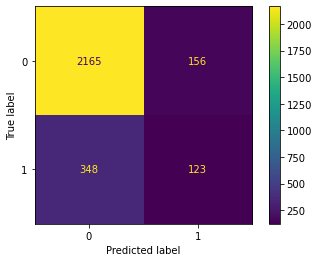

<Figure size 432x288 with 0 Axes>

In [57]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

plt.savefig("Confusion Matrix for the Binomial Logistic Regression")

**Analysis of the confusion matrix**

True Positives: 123 (Lower-right quadrant)

True Negatives: 2,165 (Upper-left quadrant)

False Positives: 156 (Upper-right quadrant)

False Negatives:348 (Lower-left quadrant)

<u>In the context of this task: 

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [58]:
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, I might want to resample the data to make it more balanced. In this case, I can use this data without modifying the class balance and continue evaluating the model.

In [59]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



**<u>Precision:**
Definition: Precision measures the accuracy of positive predictions made by the model. It is calculated as the ratio of true positive predictions to the total predicted positive instances.
Formula:

$Precision = True Positives / (True Positives+ False Positives)$

Interpretation: Precision answers the question: "Of all the instances predicted as positive, how many were actually positive?"
Focus: Precision focuses on minimizing false positives. A high precision indicates that when the model predicts an instance as positive, it is likely to be correct.
    
**<u>Recall (Sensitivity):**
    
Definition: Recall measures the ability of the model to identify all relevant instances (i.e., true positives) from the actual positive instances in the dataset. It is also known as sensitivity or true positive rate.
Formula:
    
$Recall=True Positives / (True Positives + False Negatives)$

 
Interpretation: Recall answers the question: "Of all the actual positive instances, how many were predicted as positive by the model?"
Focus: Recall focuses on minimizing false negatives. A high recall indicates that the model can identify a large proportion of positive instances correctly.

    
**<u>Trade-off Between Precision and Recall:**
There is often a trade-off between precision and recall. Increasing one metric may decrease the other.
F1-Score: The harmonic mean of precision and recall
    
$𝐹1 = (2×Precision×Recall) / (Precision + Recall)$

is used to balance between precision and recall. It is a useful metric for models with imbalanced classes.


The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Modeling approach 2: Descision Tree Classifier

In [60]:
#Isolate the y variable
y = df_enc["left"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [61]:
#Isolate the features
X = df_enc.drop("left",axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=0)

#### Decision Tree round 1

In [66]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',  # Use predefined string for accuracy
    'precision': make_scorer(precision_score),  # Use make_scorer for precision
    'recall': make_scorer(recall_score),  # Use make_scorer for recall
    'f1': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)# Use make_scorer for F1 score
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc_score')

In [67]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.76 s, sys: 57 ms, total: 2.82 s
Wall time: 2.84 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc_score',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc_score': make_scorer(roc_auc_score, response_method='predict')})

In [68]:
tree1.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                       random_state=0)

In [69]:
# Check best AUC score on CV
tree1.best_score_

0.9548070613085594

Next, I can write a function that will help you extract all the scores from the grid search. 

In [70]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc_score',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc_score
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [71]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.971662,0.914947,0.94238,0.98143,0.954807


**Plot the ROC curve : Receiver Operating Characteristic**
It is a graphical representation of the performance of a binary classifier at different classification thresholds. 

The curve plots the possible True Positive rates (TPR) against the False Positive rates (FPR).

TPR (True Positive rate, also known as recall) shows the share of detected true positives. For example, the share of emails correctly labeled as spam out of all spam emails in the dataset.

In the example confusion matrix above, TPR = 600 / ( 600 + 300) = 0.67. The model successfully detected 67% of all spam emails.

FPR (False Positive rate) shows the share of objects falsely assigned a positive class out of all objects of the negative class. For example, the proportion of legitimate emails falsely labeled as spam.

In our example, FPR = 100 / (100 + 9000) = 0.01. The model falsely flagged 1% of legitimate emails as spam.

The ROC curve illustrates this trade-off between the TPR and FPR we just explored. Unless your model is near-perfect, you have to balance the two. As you try to increase the TPR (i.e., correctly identify more positive cases), the FPR may also increase (i.e., you get more false alarms). 

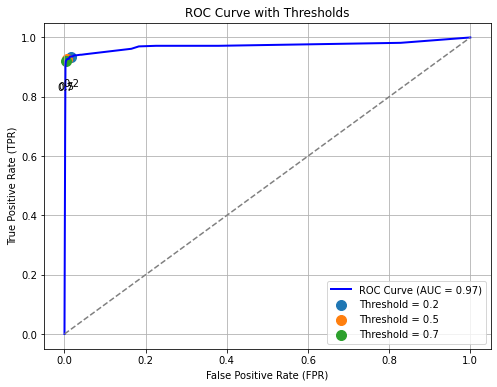

<Figure size 432x288 with 0 Axes>

In [72]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class (class 1)
y_probs = tree1.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with thresholds
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random guessing

# Plot thresholds on the ROC curve
threshold_values = [0.2, 0.5, 0.7]  # Example threshold values to plot
for threshold in threshold_values:
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.scatter(fpr[idx], tpr[idx], s=100, label=f'Threshold = {threshold}', marker='o')

# Annotate points with threshold values
for i, threshold in enumerate(threshold_values):
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.annotate(f'{threshold}', (fpr[idx], tpr[idx] - 0.1), color='black', fontsize=10, ha='center')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve with Thresholds')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.savefig("ROC Curve")

#### Random forest round 1

In [97]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',  # Use predefined string for accuracy
    'precision': make_scorer(precision_score),  # Use make_scorer for precision
    'recall': make_scorer(recall_score),  # Use make_scorer for recall
    'f1': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)# Use make_scorer for F1 score
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc_score')

In [93]:
#%%time
#rf1.fit(X_train, y_train) 

In [100]:
# Define a path to the folder where you want to save the model
path = '/Users/adel/Desktop/Capstone/'

In [ ]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [101]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [102]:
rf1 = read_pickle(path,'hr_rf1')

In [103]:
rf1.best_estimator_

RandomForestClassifier(max_features=1.0, max_samples=0.7, n_estimators=500,
                       random_state=0)

In [420]:
# Write pickle
#write_pickle(path, rf1, 'hr_rf1')

In [421]:
# Read pickle
#rf1 = read_pickle(path, 'hr_rf1')

In [104]:
# Check best AUC score on CV
rf1.best_score_

0.9560746240197273

In [105]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [106]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall       F1  accuracy       auc
0  decision tree cv   0.971662  0.914947  0.94238   0.98143  0.954807
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.984833  0.914949  0.948572  0.983543  0.956075


Define a function that gets all the scores from a model's predictions.

In [107]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

Now use the best performing model to predict on the test set.

In [108]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.991361,0.921687,0.955255,0.985657,0.960043


#### Data leakage


Data leakage is a critical issue in machine learning that occurs when information from outside the training dataset is used to create a model, leading to overly optimistic performance estimates or incorrect conclusions. Data leakage can significantly impact the generalization ability of a machine learning model and should be avoided to ensure the model's reliability and effectiveness.

**Types of Data Leakage:**

<u>1. Train-Test Contamination:</u>
Occurs when information from the test set inadvertently influences the training process.
Examples include using test set statistics (e.g., mean, standard deviation) to preprocess the training set or using test set labels during model training.

<u>2. Temporal Data Leakage:</u>
Occurs when information from the future is used to predict past events.
Examples include using future timestamps or events as predictors for past events, leading to unrealistic performance estimates.

<u>3. Feature Leakage:</u>
Occurs when data features contain information that would not be available at the time of prediction.
Examples include including the target variable in the feature set, using identifiers (e.g., customer IDs) as features, or encoding timestamps directly as features.

<u>4. Target Leakage:</u>
Occurs when the target variable contains information not available at the time of prediction.
Examples include including derived or engineered features that incorporate information from the target variable.

**Preventing Data Leakage:**
To prevent data leakage and ensure the integrity and reliability of machine learning models, consider the following best practices:

<u>1. Use Proper Cross-Validation:</u>
Always split the data into training and test sets before any data preprocessing or feature engineering.
Use techniques like K-Fold Cross-Validation to evaluate model performance without contaminating the training process.

<u>2. Feature Engineering and Preprocessing:</u>
Ensure that feature engineering and preprocessing steps are applied only to the training data.
Compute statistics (e.g., mean, standard deviation) from the training set and apply them consistently to both the training and test sets.

<u>3. Temporal Validation:</u>
Be mindful of temporal data when dealing with time-series or sequential data.
Always split the data based on time, ensuring that the training set contains data from earlier time periods than the test set.

<u>4. Feature Selection:</u>
Avoid using features that contain information about the target variable or are derived from it.
Perform feature selection based solely on the training set to avoid using future information.

<u>5. Regular Auditing:</u>
Regularly audit your data pipeline and model development process to identify and rectify potential sources of data leakage.

I'm gonna proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. I will call this new feature `overworked`. It will be a binary variable.

In [109]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [110]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_montly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [111]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [112]:
df2.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [113]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_montly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [114]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [115]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 2

In [116]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',  # Use predefined string for accuracy
    'precision': make_scorer(precision_score),  # Use make_scorer for precision
    'recall': make_scorer(recall_score),  # Use make_scorer for recall
    'f1': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)# Use make_scorer for F1 score
}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc_score')

In [117]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.52 s, sys: 61.2 ms, total: 2.58 s
Wall time: 2.67 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc_score',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict'),
                      'roc_auc_score': make_scorer(roc_auc_score, response_method='predict')})

In [118]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall       F1  accuracy       auc
0  decision tree cv   0.971662  0.914947  0.94238   0.98143  0.954807
               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.93651


#### Random forest - Round 2

In [119]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',  # Use predefined string for accuracy
    'precision': make_scorer(precision_score),  # Use make_scorer for precision
    'recall': make_scorer(recall_score),  # Use make_scorer for recall
    'f1': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)# Use make_scorer for F1 score
}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc_score')

In [120]:
#%%time
#rf2.fit(X_train, y_train) 

In [121]:
#write_pickle(path,rf2,"hr_rf2")

In [122]:
rf2 = read_pickle(path,"hr_rf2")

In [123]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.93651
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.910057  0.887475  0.898603  0.966752  0.935004


In [124]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.900407,0.889558,0.894949,0.96531,0.934979


**Reults:**

This seems to be a stable, well-performing final model. 

## Feature Importance

### Decision Tree round 2

In [125]:
tree2_importance = pd.DataFrame(tree2.best_estimator_.feature_importances_, index=X.columns, columns= ["gini_importance"])
tree2_importance = tree2_importance.sort_values(by="gini_importance", ascending=False)
tree2_importance

tree2_importance = tree2_importance[tree2_importance['gini_importance'] != 0]
tree2_importance

,gini_importance
last_evaluation,0.343958
number_project,0.343385
time_spend_company,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


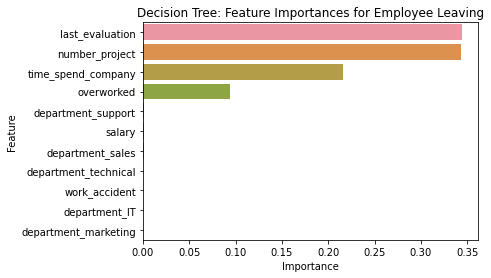

<Figure size 432x288 with 0 Axes>

In [129]:
sns.barplot(data=tree2_importance, x="gini_importance", y=tree2_importance.index)
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

plt.savefig("Feature Importance by Decision Tree")

### Random Forest round 2

In [127]:
rf_importance = pd.DataFrame(rf2.best_estimator_.feature_importances_, index=X.columns, columns=["gini_importance"])
rf_importance = rf_importance.sort_values(by = "gini_importance", ascending=False)
rf_importance

,gini_importance
last_evaluation,0.346426
number_project,0.315219
time_spend_company,0.211460
overworked,0.084867
salary,0.014071
work_accident,0.005495
department_technical,0.004937
department_sales,0.004860
department_support,0.003798
department_IT,0.001761


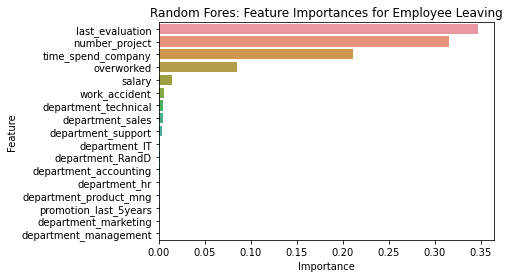

<Figure size 432x288 with 0 Axes>

In [130]:
sns.barplot(data=rf_importance, x='gini_importance', y=rf_importance.index)
plt.title("Random Fores: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()
plt.savefig("Feature Importance by Random Forest")

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `time spend company`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.